# Block 7 Übung 3: Selektion von Patientenkohorten nach Diagnose

## Bibliotheken & Konfiguration

In [1]:
packages <- c("readr", "dplyr", "lubridate", "ggplot2")
install.packages(setdiff(packages, rownames(installed.packages())))
lapply(packages, require, character.only = TRUE)

base_url <- "https://raw.githubusercontent.com/ganslats/TMF-School-Datenanalyse-Visualisierung/master/Rohdaten/"

Lade nötiges Paket: readr

Lade nötiges Paket: dplyr


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


Lade nötiges Paket: lubridate


Attache Paket: ‘lubridate’


Die folgenden Objekte sind maskiert von ‘package:base’:

    date, intersect, setdiff, union


Lade nötiges Paket: ggplot2



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

## MIMIC III-Basisdaten laden

In [2]:
# Patientenstammdaten laden
mimic.patients.raw <- read_csv(paste(base_url, "mimic-iii-demo/PATIENTS.csv", sep=""),
                               col_types = cols(row_id = col_integer(), subject_id = col_integer(), gender = col_character(), dob = col_datetime(format = ""), dod = col_datetime(format = ""), dod_hosp = col_datetime(format = ""), dod_ssn = col_datetime(format = ""), expire_flag = col_double()))

# Behandlungsfälle laden
mimic.admissions.raw <- read_csv(paste(base_url, "mimic-iii-demo/ADMISSIONS.csv", sep=""),
                                 col_types = cols(  row_id = col_integer(), subject_id = col_integer(), hadm_id = col_integer(), admittime = col_datetime(format = ""), dischtime = col_datetime(format = ""), deathtime = col_datetime(format = ""), admission_type = col_character(), admission_location = col_character(), discharge_location = col_character(), insurance = col_character(), language = col_character(), religion = col_character(), marital_status = col_character(), ethnicity = col_character(), edregtime = col_datetime(format = ""), edouttime = col_datetime(format = ""), diagnosis = col_character(), hospital_expire_flag = col_double(), has_chartevents_data = col_double()))

# Intensivaufenthalte laden
mimic.icustays.raw <- read_csv(paste(base_url, "mimic-iii-demo/ICUSTAYS.csv", sep=""),
                               col_types = cols(row_id = col_integer(), subject_id = col_integer(), hadm_id = col_integer(), icustay_id = col_integer(), dbsource = col_character(), first_careunit = col_character(), last_careunit = col_character(), first_wardid = col_double(), last_wardid = col_double(), intime = col_datetime(format = ""), outtime = col_datetime(format = ""), los = col_double()))


## MIMIC III-Diagnosen laden

In [3]:
# Diagnosen laden
mimic.diagnoses.raw <- read_csv(paste(base_url, "mimic-iii-demo/DIAGNOSES_ICD.csv", sep=""),
                                col_types = cols(row_id = col_integer(), subject_id = col_integer(), hadm_id = col_integer(), seq_num = col_integer(), icd9_code = col_character()))

### Bezeichner ergänzen

In [4]:
# Diagnosebezeichner laden
mimic.d_icd_diagnoses.raw <- read_csv(paste(base_url, "mimic-iii-demo/D_ICD_DIAGNOSES.csv", sep=""),
                                      col_types = cols(row_id = col_integer(), icd9_code = col_character(), short_title = col_character(), long_title = col_character()))

# Diagnosebezeichner hinzufügen
mimic.diagnoses.annotated <- mimic.diagnoses.raw %>% inner_join(mimic.d_icd_diagnoses.raw %>% select(icd9_code, short_title, long_title), by = "icd9_code")

head(mimic.diagnoses.annotated)

row_id,subject_id,hadm_id,seq_num,icd9_code,short_title,long_title
<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
112344,10006,142345,1,99591,Sepsis,Sepsis
112345,10006,142345,2,99662,React-oth vasc dev/graft,"Infection and inflammatory reaction due to other vascular device, implant, and graft"
112347,10006,142345,4,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecified, with chronic kidney disease stage V or end stage renal disease"
112348,10006,142345,5,42731,Atrial fibrillation,Atrial fibrillation
112349,10006,142345,6,4280,CHF NOS,"Congestive heart failure, unspecified"
112350,10006,142345,7,4241,Aortic valve disorder,Aortic valve disorders


## Beispiel: Diagnosekatalog nach Begriff "Sepsis" durchsuchen

In [5]:
mimic.d_icd_diagnoses.raw %>% 
    filter(grepl("Sepsis", long_title))

row_id,icd9_code,short_title,long_title
<int>,<chr>,<chr>,<chr>
11403,99591,Sepsis,Sepsis


## Aufenthalte mit Sepsis herausfiltern

In [6]:
# Kohorte abfragen
cohort.sep <- mimic.diagnoses.annotated %>% 
    filter(grepl("Sepsis", long_title)) %>% # Diagnosen mit (Teil-)Begriff "Sepsis" im Langbezeichner filtern
    select(hadm_id) %>%                     # für die gefundenen Einträge nur die Fallnummer selektieren
    distinct() %>%                          # doppelte Fallnummern zusammenführen
    mutate(cohort_sep_flag = TRUE)          # Spalte mit Sepsis-Flag ergänzen

# Anzahl der Treffer ausgeben
cohort.sep %>% summarize(n = n())

# Erste 6 Treffer ausgeben
head(cohort.sep)

n
<int>
10


hadm_id,cohort_sep_flag
<int>,<lgl>
142345,TRUE
111115,TRUE
149044,TRUE
170883,TRUE
197611,TRUE
104697,TRUE


## Aufgabe: Filtern Sie je eine Kohorte mit akutem Herzinfarkt sowie akutem Nierenversagen heraus!

Hier können Sie das Wissen aus dem Abschnitt 4, Demo 2 (Daten abfragen mit Tidyverse) anwenden.
* zugehöriges Notebook: [teil-4-demo-02-abfragen-tidyverse.ipynb](https://github.com/ganslats/TMF-School-2021-Block-7/blob/main/Notebooks/teil-4-demo-02-abfragen-tidyverse.ipynb)

Legen Sie die Kohorte jeweils in einem eigenen Tibble nach dem folgenden Schema ab:
* Name des Tibbles: cohort.Kürzel (z.B. `cohort.ami` für acute myocardial infarction, `cohort.acf` für acute kidney failure)
* Flag-Spalte für die Erkrankung mit dem gleichen Kürzel (z.B. `cohort_ami_flag`, `cohort_acf_flag`)

Sonstige Tipps:
* in der `grepl()`-Funktion können Sie neben den reinen Suchbegriffen auch *regular Expressions* verwenden, um z.B. mehrere Schreibweisen eines Wort wahlweise zuzulassen. Einen Überblick zu den in RegExes verwendbaren Matches finden Sie auf Seite des des [RStudio-Cheat Sheets zum stringr-Package](https://evoldyn.gitlab.io/evomics-2018/ref-sheets/R_strings.pdf)
* auf [regex101.com](https://regex101.com/) können regular Expressions interaktiv getestet & debugged werden. Bitte denken Sie daran, dass es sich dabei um ein Internetangebot handelt & keine Texte mit personenbezogenen Daten für Tests dort verwendet werden dürfen.

In [7]:
# Kohorte mit akutem Herzinfarkt (Acute myocardial infarction)
mimic.d_icd_diagnoses.raw %>% 
    filter(grepl("Acute myocardial infarction", long_title))

cohort.ami <- mimic.diagnoses.annotated %>% 
    filter(grepl("Acute myocardial infarction", long_title)) %>%
    select(hadm_id) %>%
    distinct() %>%
    mutate(cohort_ami_flag = TRUE)

# Anzahl der Treffer ausgeben
cohort.ami %>% summarize(n = n())

# Erste 6 Treffer ausgeben
head(cohort.ami)

row_id,icd9_code,short_title,long_title
<int>,<chr>,<chr>,<chr>
4335,41000,"AMI anterolateral,unspec","Acute myocardial infarction of anterolateral wall, episode of care unspecified"
4336,41001,"AMI anterolateral, init","Acute myocardial infarction of anterolateral wall, initial episode of care"
4337,41002,"AMI anterolateral,subseq","Acute myocardial infarction of anterolateral wall, subsequent episode of care"
4338,41010,"AMI anterior wall,unspec","Acute myocardial infarction of other anterior wall, episode of care unspecified"
4339,41011,"AMI anterior wall, init","Acute myocardial infarction of other anterior wall, initial episode of care"
4340,41012,"AMI anterior wall,subseq","Acute myocardial infarction of other anterior wall, subsequent episode of care"
4341,41020,"AMI inferolateral,unspec","Acute myocardial infarction of inferolateral wall, episode of care unspecified"
4342,41021,"AMI inferolateral, init","Acute myocardial infarction of inferolateral wall, initial episode of care"
4343,41022,"AMI inferolateral,subseq","Acute myocardial infarction of inferolateral wall, subsequent episode of care"


n
<int>
3


hadm_id,cohort_ami_flag
<int>,<lgl>
182879,TRUE
151323,TRUE
149950,TRUE


In [8]:
# Kohorte mit akutem Nierenversagen (Acute kidney failure)
mimic.d_icd_diagnoses.raw %>% 
    filter(grepl("Acute kidney failure", long_title))

cohort.acf <- mimic.diagnoses.annotated %>% 
    filter(grepl("Acute kidney failure", long_title)) %>%
    select(hadm_id) %>%
    distinct() %>%
    mutate(cohort_acf_flag = TRUE)

# Anzahl der Treffer ausgeben
cohort.acf %>% summarize(n = n())

# Erste 6 Treffer ausgeben
head(cohort.acf)

row_id,icd9_code,short_title,long_title
<int>,<chr>,<chr>,<chr>
5904,5845,"Ac kidny fail, tubr necr",Acute kidney failure with lesion of tubular necrosis
5905,5846,"Ac kidny fail, cort necr",Acute kidney failure with lesion of renal cortical necrosis
5906,5847,"Ac kidny fail, medu necr",Acute kidney failure with lesion of renal medullary [papillary] necrosis
5907,5848,Acute kidney failure NEC,Acute kidney failure with other specified pathological lesion in kidney
5908,5849,Acute kidney failure NOS,"Acute kidney failure, unspecified"
13534,66930,Ac kidny fail w del-unsp,"Acute kidney failure following labor and delivery, unspecified as to episode of care or not applicable"
13535,66932,Ac kidney fail-del w p/p,"Acute kidney failure following labor and delivery, delivered, with mention of postpartum complication"
13536,66934,Ac kidney fail-postpart,"Acute kidney failure following labor and delivery, postpartum condition or complication"


n
<int>
51


hadm_id,cohort_acf_flag
<int>,<lgl>
177759,TRUE
140372,TRUE
157235,TRUE
189483,TRUE
111115,TRUE
126949,TRUE


## Optionale Ergänzung: Visualisieren Sie die Demographie & Falldaten der Kohorten!

### Beispiel für die Sepsis-Kohorte

hadm_id,cohort_sep_flag,subject_id,admittime,dischtime,discharge_location,gender,dob,length_of_stay_days,age
<int>,<lgl>,<int>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<drtn>,<int>
142345,TRUE,10006,2164-10-23 21:09:00,2164-11-01 17:15:00,HOME HEALTH CARE,F,2094-03-05,8.837500 days,70
111115,TRUE,10038,2144-02-09 17:53:00,2144-02-21 13:30:00,SNF,F,2056-01-27,11.817361 days,88
149044,TRUE,10088,2107-05-12 18:00:00,2107-05-18 13:30:00,SNF,M,2029-07-09,5.812500 days,77
170883,TRUE,10124,2192-04-16 20:57:00,2192-05-15 19:28:00,DEAD/EXPIRED,F,2108-12-20,28.938194 days,83
197611,TRUE,10132,2123-08-23 20:00:00,2123-09-17 14:00:00,HOME HEALTH CARE,F,2058-04-23,24.750000 days,65
104697,TRUE,40612,2159-11-17 03:28:00,2159-11-22 14:15:00,SNF,F,2073-08-13,5.449306 days,86


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


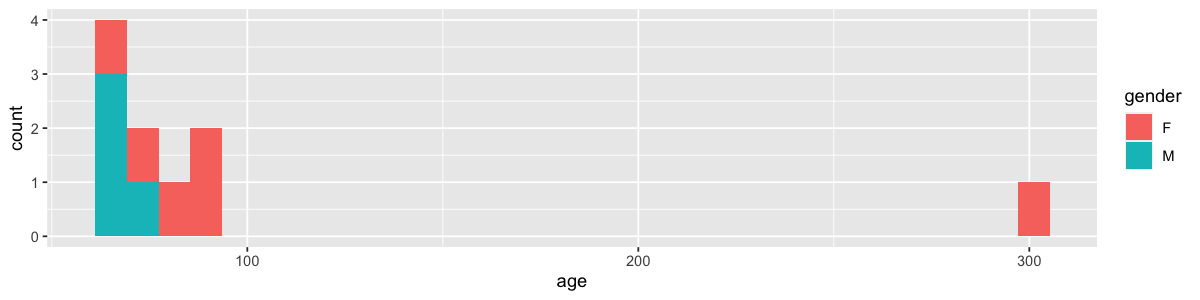

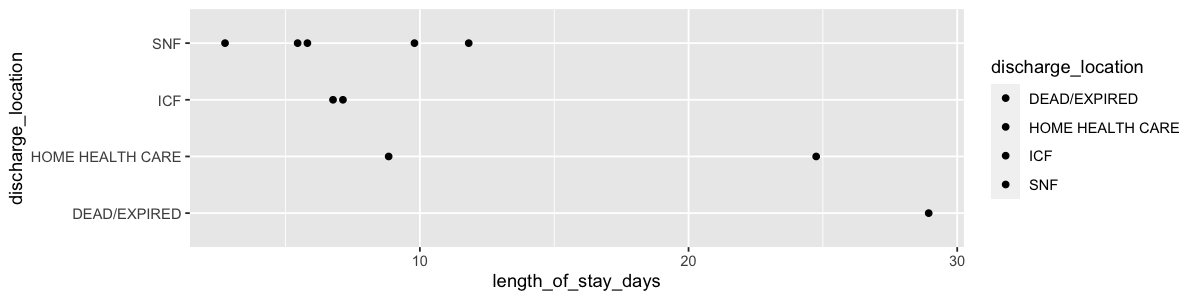

In [9]:
# Kohorte um Fall- & Patientenstammdaten ergänzen
cases.sep <- cohort.sep %>%
    # ausgewählte Falldaten joinen
    inner_join(mimic.admissions.raw %>% select(subject_id, hadm_id, admittime, dischtime, discharge_location), by = "hadm_id") %>%
    # ausgewählte Patientenstammdaten joinen
    inner_join(mimic.patients.raw %>% select(subject_id, gender, dob), by = "subject_id") %>%
    # Aufenthaltsdauer & Alter berechnen
    mutate(length_of_stay_days = difftime(dischtime, admittime, units = "days"),
           age                 = as.integer(interval(dob, admittime) / years(1)))

head(cases.sep)

# Alter & Geschlecht ausgeben
options(repr.plot.width = 10, repr.plot.height = 2.5)
ggplot(data = cases.sep, aes(x = age, fill = gender)) +
    geom_histogram()

# Aufenthaltsdauer & Entlassart ausgeben
ggplot(data = cases.sep, aes(x = length_of_stay_days, y = discharge_location, fill = discharge_location)) +
    geom_point()

### Visualisierung für AMI-Kohorte

hadm_id,cohort_ami_flag,subject_id,admittime,dischtime,discharge_location,gender,dob,length_of_stay_days,age
<int>,<lgl>,<int>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<drtn>,<int>
182879,TRUE,40601,2184-08-04 05:44:00,2184-08-10 15:30:00,SNF,F,2112-01-20,6.406944 days,72
151323,TRUE,42075,2166-02-12 17:57:00,2166-02-26 00:00:00,DEAD/EXPIRED,M,2086-02-04,13.252083 days,80
149950,TRUE,43827,2176-07-14 13:24:00,2176-07-18 15:00:00,HOME HEALTH CARE,F,1876-07-14,4.066667 days,300


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


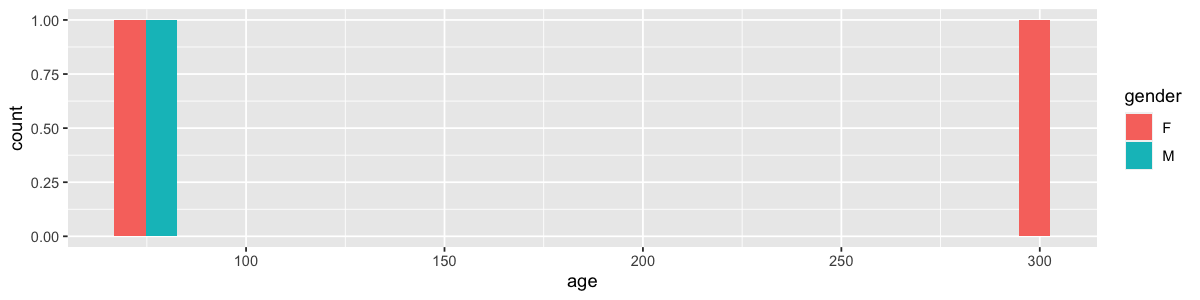

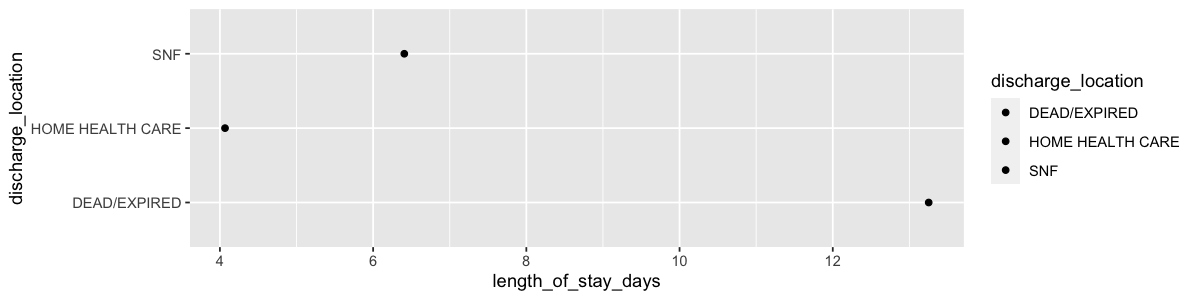

In [10]:
# Kohorte um Fall- & Patientenstammdaten ergänzen
cases.ami <- cohort.ami %>%
    # ausgewählte Falldaten joinen
    inner_join(mimic.admissions.raw %>% select(subject_id, hadm_id, admittime, dischtime, discharge_location), by = "hadm_id") %>%
    # ausgewählte Patientenstammdaten joinen
    inner_join(mimic.patients.raw %>% select(subject_id, gender, dob), by = "subject_id") %>%
    # Aufenthaltsdauer & Alter berechnen
    mutate(length_of_stay_days = difftime(dischtime, admittime, units = "days"),
           age                 = as.integer(interval(dob, admittime) / years(1)))

head(cases.ami)

# Alter & Geschlecht ausgeben
options(repr.plot.width = 10, repr.plot.height = 2.5)
ggplot(data = cases.ami, aes(x = age, fill = gender)) +
    geom_histogram()

# Aufenthaltsdauer & Entlassart ausgeben
ggplot(data = cases.ami, aes(x = length_of_stay_days, y = discharge_location, fill = discharge_location)) +
    geom_point()

### Visualisierung für ACF-Kohorte

hadm_id,cohort_acf_flag,subject_id,admittime,dischtime,discharge_location,gender,dob,length_of_stay_days,age
<int>,<lgl>,<int>,<dttm>,<dttm>,<chr>,<chr>,<dttm>,<drtn>,<int>
177759,TRUE,10019,2163-05-14 20:43:00,2163-05-15 12:00:00,DEAD/EXPIRED,M,2114-06-20,0.6368056 days,48
140372,TRUE,10032,2138-04-02 19:52:00,2138-04-15 14:35:00,REHAB/DISTINCT PART HOSP,M,2050-03-29,12.7798611 days,88
157235,TRUE,10033,2132-12-05 02:46:00,2132-12-08 15:15:00,SNF,F,2051-04-21,3.5201389 days,81
189483,TRUE,10036,2185-03-24 16:56:00,2185-03-26 09:15:00,DEAD/EXPIRED,F,1885-03-24,1.6798611 days,300
111115,TRUE,10038,2144-02-09 17:53:00,2144-02-21 13:30:00,SNF,F,2056-01-27,11.8173611 days,88
126949,TRUE,10045,2129-11-24 00:31:00,2129-12-01 01:45:00,DEAD/EXPIRED,F,2061-03-25,7.0513889 days,68


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


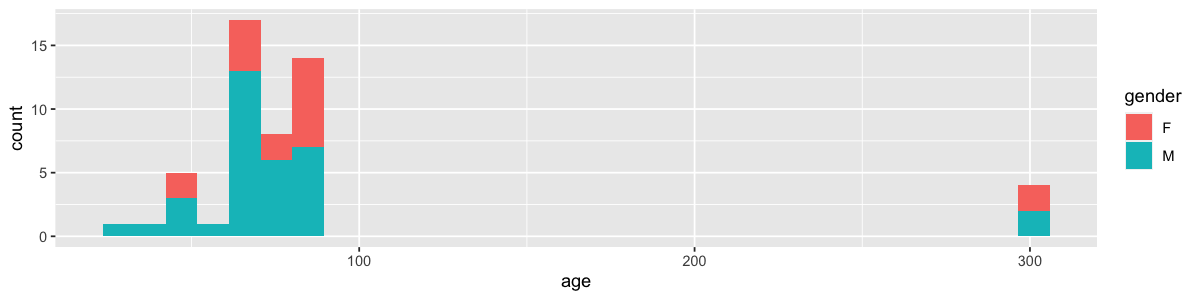

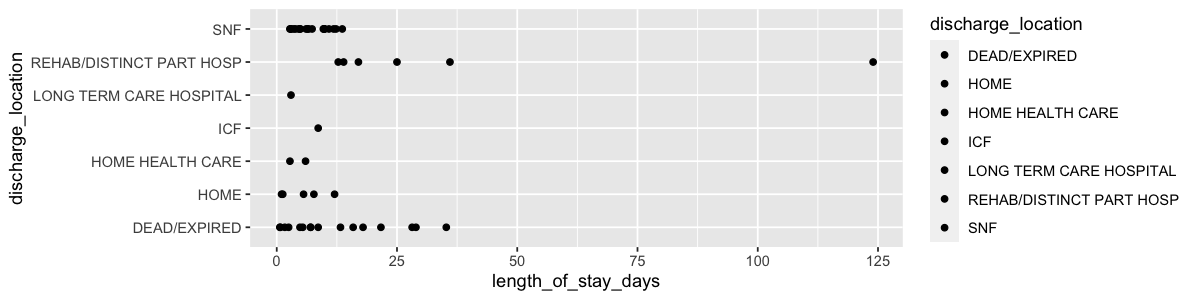

In [11]:
# Kohorte um Fall- & Patientenstammdaten ergänzen
cases.acf <- cohort.acf %>%
    # ausgewählte Falldaten joinen
    inner_join(mimic.admissions.raw %>% select(subject_id, hadm_id, admittime, dischtime, discharge_location), by = "hadm_id") %>%
    # ausgewählte Patientenstammdaten joinen
    inner_join(mimic.patients.raw %>% select(subject_id, gender, dob), by = "subject_id") %>%
    # Aufenthaltsdauer & Alter berechnen
    mutate(length_of_stay_days = difftime(dischtime, admittime, units = "days"),
           age                 = as.integer(interval(dob, admittime) / years(1)))

head(cases.acf)

# Alter & Geschlecht ausgeben
options(repr.plot.width = 10, repr.plot.height = 2.5)
ggplot(data = cases.acf, aes(x = age, fill = gender)) +
    geom_histogram()

# Aufenthaltsdauer & Entlassart ausgeben
ggplot(data = cases.acf, aes(x = length_of_stay_days, y = discharge_location, fill = discharge_location)) +
    geom_point()